In [1]:
from fdr_hacking.data_generation import *
from fdr_hacking.util import *

In [2]:
real_data_df = load_eg_realworld_data()

In [3]:
# When the correlations from real-world data are exactly used in simulations (using copulas), the correlations in the generated synthetic data

real_beta_values = sample_realworld_methyl_val(n_sites=1000, realworld_data=real_data_df)
real_corr = determine_correlation_matrix(real_beta_values)
alpha_params, beta_params = estimate_beta_dist_parameters(methyl_beta_values=real_beta_values)
synth_beta_values = synthesize_methyl_val_with_copula(correlation_matrix=real_corr, n_observations=200,
                                                      beta_dist_alpha_params=alpha_params, beta_dist_beta_params=beta_params)
synth_corr = determine_correlation_matrix(synth_beta_values)
real_synth_corr = np.corrcoef(real_corr.flatten(), synth_corr.flatten())
real_synth_corr

array([[1.        , 0.95776243],
       [0.95776243, 1.        ]])

In [10]:
synth_beta_uten_dependence = synthesize_methyl_val_without_dependence(n_sites=1000, n_observations=100,
                                                                      beta_dist_alpha_params=alpha_params,
                                                                      beta_dist_beta_params=beta_params)
synth_uten_corr = determine_correlation_matrix(synth_beta_uten_dependence)
np.corrcoef(real_corr.flatten(), synth_uten_corr.flatten())

array([[1.      , 0.032586],
       [0.032586, 1.      ]])

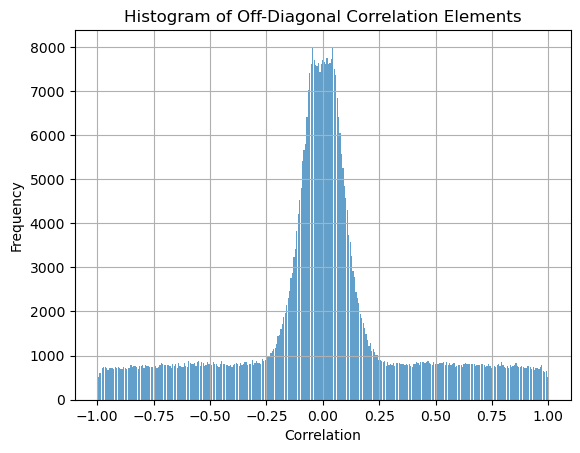

In [4]:
synth_beta_with_dependence = simulate_methyl_data(real_data_df, n_sites=1000,  n_observations=100, dependencies = True)
synth_copula_corrmat = determine_correlation_matrix(synth_beta_with_dependence)
plot_correlation_histogram(synth_copula_corrmat)


In [5]:
intervals = estimate_realworld_corrcoef_distribution(methyl_beta_values=synth_beta_with_dependence)
intervals

[(-0.99996399639964, -0.573201920192019),
 (-0.573201920192019, -0.19959195919591957),
 (-0.19959195919591957, -0.08811281128112809),
 (-0.08811281128112809, -0.041140114011401135),
 (-0.041140114011401135, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.000528052805280528),
 (0.000528052805280528, 0.04211221122112212),
 (0.04211221122112212, 0.0899009900990099),
 (0.0899009900990099, 0.20559255925592557),
 (0.20559255925592557, 0.5793465346534644),
 (0.5793465346534644, 0.9999879987998799)]

In [6]:
real_intervals = estimate_realworld_corrcoef_distribution(methyl_beta_values=real_beta_values)
real_intervals


[(-0.9168067226890757, -0.20868347338935572),
 (-0.20868347338935572, -0.10336134453781515),
 (-0.10336134453781515, -0.025770308123249302),
 (-0.025770308123249302, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.04061624649859944),
 (0.04061624649859944, 0.10476190476190476),
 (0.10476190476190476, 0.16946778711484592),
 (0.16946778711484592, 0.23921568627450984),
 (0.23921568627450984, 0.3221288515406162),
 (0.3221288515406162, 0.44005602240896363),
 (0.44005602240896363, 0.969467787114846)]